# Predictive Analysis using scikit-learn

## Introduction

Understanding the intricate dynamics of customer behavior is paramount for optimizing business strategies and nurturing long-term customer satisfaction. This project delves into this realm by analyzing a real-world dataset of over 14,000 customer surveys. Equipped with 12 key variables that shed light on customer profiles and a single target variable indicating purchase decisions, we embark on a journey to uncover the hidden forces that drive customer choices. Through data visualization and meticulous analysis, we aim to unlock valuable insights and ultimately, predict with precision whether a customer will embrace a new product offering.

## Objectives

This analysis embarks on a mission to uncover the hidden patterns behind customer purchasing decisions. Through meticulous data exploration and utilization of machine learning, we aim to pinpoint the key factors that influence a customer's propensity to buy another product. By shedding light on these critical drivers, we equip businesses with valuable insights to optimize their marketing strategies and forge deeper customer connections.

Our journey begins with acquiring, exploring, and meticulously preparing a dataset rich with customer-centric information. We carefully address missing values and select relevant columns, ensuring the foundation for accurate analysis. The next step involves a deep dive into the data through Exploratory Data Analysis (EDA), revealing the hidden relationships and distributions among crucial variables. From age and product type to the length of customer-company relationships, we extract insights that unlock the secrets of consumer behavior.

To prepare for model building, we carefully transform categorical variables like "Type_A" and "Type_B" into dummy variables, ensuring their smooth integration into predictive algorithms. Leveraging the powerful tools of scikit-learn, we embark on constructing logistic regression models. These models meticulously evaluate the predictive power of each variable, ultimately identifying the most potent predictors of purchase behavior.

With the models constructed and their outputs analyzed, we gain a profound understanding of the impact each variable has on the likelihood of a customer making a purchase. By delving into the coefficients and accuracy metrics, we uncover the hidden truths behind consumer decisions.

Finally, we weave together the threads of our analysis, crafting a comprehensive summary of findings and drawing conclusive insights. This culmination of our efforts culminates in actionable recommendations, paving the way for further analysis and strategic adjustments. By harnessing the power of data-driven insights, businesses can now refine their marketing approach, fostering a stronger and more profitable relationship with their customers.

### Data Loading + Manipulation

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/anagh3395/DAV5400/main/Module12/Project%204%20DATA.csv')
df

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,386.434278,284.309508,30,3
14012,Y,1,151634,27,2,1,3,3,1,376.842591,266.993794,27,27
14013,Y,99,151679,26,2,0,0,0,0,434.805703,284.629361,26,3
14014,Y,1,151804,75,2,1,3,3,1,366.273857,270.573265,75,15


In [3]:
df.shape

(14016, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   prod_A      14016 non-null  int64  
 6   type_A      14016 non-null  int64  
 7   type_B      14016 non-null  int64  
 8   prod_B      14016 non-null  int64  
 9   turnover_A  14016 non-null  float64
 10  turnover_B  14016 non-null  float64
 11  age_P       14016 non-null  int64  
 12  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1.4+ MB


#### Dataset observation

There are total 14016 rows and 13 columns . We see at the moment only 1 feature (TARGET) is of type object . Rest are either int or float . Our exploration of the data reveals a refreshing absence of missing values across all 13 features. This state provides a solid foundation for our analysis, free from the complexities of data imputation. The variable names, adhering to Pythonic conventions, enhance readability and facilitate seamless interpretation. Notably, the target variable, "Target," boasts a binary format of "yes" and "no," which we will subsequently convert to numeric values ("0" and "1") to facilitate its integration into machine learning models.

In [6]:
subset_df = df[['TARGET', 'age', 'type_A', 'type_B', 'lor_M', 'prod_A', 'turnover_A']]
subset_df

,TARGET,age,type_A,type_B,lor_M,prod_A,turnover_A
0,Y,66,0,0,3,0,333.561114
1,Y,45,3,3,39,1,394.735699
2,Y,42,3,6,27,1,342.180990
3,Y,31,0,0,3,0,453.757916
4,Y,62,0,0,3,0,384.577469
...,...,...,...,...,...,...,...
14011,Y,30,0,0,3,0,386.434278
14012,Y,27,3,3,27,1,376.842591
14013,Y,26,0,0,3,0,434.805703
14014,Y,75,3,3,15,1,366.273857


In [7]:
subset_df['TARGET'] = subset_df['TARGET'].replace({'Y': 1, 'N': 0})
subset_df

C:\Users\anag\AppData\Local\Temp\ipykernel_5448\3444385715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['TARGET'] = subset_df['TARGET'].replace({'Y': 1, 'N': 0})


,TARGET,age,type_A,type_B,lor_M,prod_A,turnover_A
0,1,66,0,0,3,0,333.561114
1,1,45,3,3,39,1,394.735699
2,1,42,3,6,27,1,342.180990
3,1,31,0,0,3,0,453.757916
4,1,62,0,0,3,0,384.577469
...,...,...,...,...,...,...,...
14011,1,30,0,0,3,0,386.434278
14012,1,27,3,3,27,1,376.842591
14013,1,26,0,0,3,0,434.805703
14014,1,75,3,3,15,1,366.273857


In [8]:
subset_df['TARGET'].value_counts()

0    8000
1    6016
Name: TARGET, dtype: int64

### Exploratory Data Analysis

In [9]:
subset_df.describe()

,TARGET,age,type_A,type_B,lor_M,prod_A,turnover_A
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000
mean,0.429224,35.882920,1.607877,1.918878,14.115582,0.533818,379.161320
std,0.494983,12.974634,1.508991,1.686038,11.582550,0.498873,92.612207
min,0.000000,5.000000,0.000000,0.000000,3.000000,0.000000,300.095909
25%,0.000000,25.000000,0.000000,0.000000,3.000000,0.000000,334.919412
50%,0.000000,33.000000,3.000000,3.000000,15.000000,1.000000,367.891493
75%,1.000000,43.000000,3.000000,3.000000,15.000000,1.000000,399.744924
max,1.000000,102.000000,6.000000,9.000000,75.000000,1.000000,5568.784139


- Data reveals that 42.9% of the customers are target customers, suggesting a significant potential for further conversion. This translates to a mean TARGET value of 0.429.

- The average customer age sits at 35.8 years, indicating a relatively young demographic. Additionally, the mean lor_M score of 14.11 portrays a customer base with a strong inclination towards loyalty.

- The average prod_A usage of 0.53 suggests moderate engagement with Product A. This presents an opportunity to encourage increased usage and explore potential reasons for the current level.

- The customer base generates substantial revenue, with an average turnover_A of 379.16. This highlights the importance of retaining and nurturing these customers for sustained business growth.

- The high standard deviation across all variables indicates a diverse customer base with varying characteristics. This is further confirmed by the significant differences between minimum and maximum values for each variable.

To gain a deeper understanding of the data distribution, we analyzed the 25th, 50th, and 75th percentiles. For example, in the case of lor_M, we found that:

25% of customers have a loyalty score of 3.00 or less.
50% of customers have a loyalty score of 15.00 or less.
75% of customers have a loyalty score of 15.00 or less.

### Univariate Analysis

In [11]:
counts = subset_df['TARGET'].value_counts()
percentages = counts.apply(lambda x: (x / len(subset_df)) * 100)

print(f"Percentage of 0s: {percentages[0]:.2f}%")
print(f"Percentage of 1s: {percentages[1]:.2f}%")

Percentage of 0s: 57.08%
Percentage of 1s: 42.92%


Calculates the percentage of customers who will and will not purchase the new product, providing a concise overview of customer behavior. It uses a lambda function for efficient calculation and f-strings for formatted output.

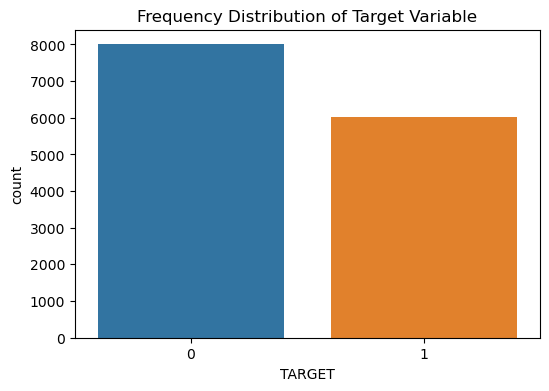

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=subset_df)
plt.title('Frequency Distribution of Target Variable')
plt.show();

Our analysis reveals that customer behavior towards the new product leans towards reluctance. The binary target variable, where "1" represents purchase and "0" represents non-purchase, paints a clear picture: a smaller proportion of customers, at 42.9%, represent the "yes" category, signifying an inclination to purchase. The remaining 57.1%, falling under the "no" category, indicates that a majority of customers are currently not interested in the new offering.

#### Distribution of AGE 

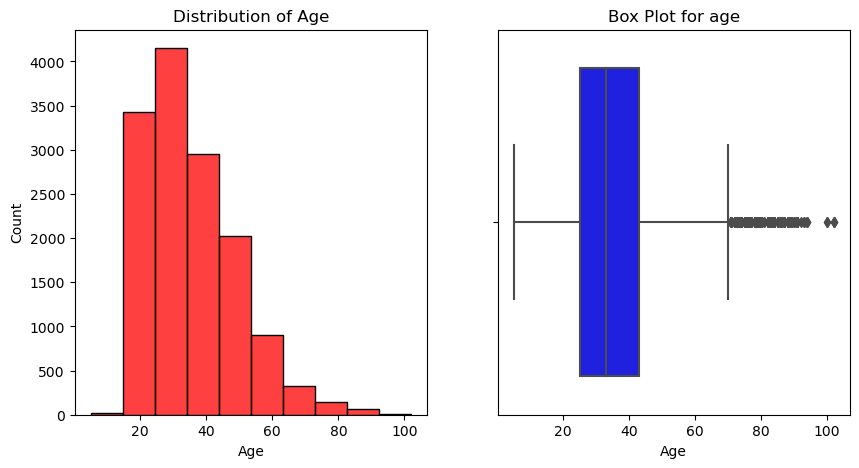

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(subset_df['age'],bins =10, color='red')
# Set plot label and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')


# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.boxplot(x='age', data=subset_df, color='blue')
plt.title('Box Plot for age')
plt.xlabel('Age')
plt.show();

Our analysis reveals a right-skewed distribution in the age of customers, indicating a larger population clustering around the younger age groups.
Histogram: The histogram depicts a pronounced rightward tail, suggesting a significant presence of customers beyond the average age.
Box Plot: This plot provides a comprehensive view, highlighting the interquartile range (24-43) where the majority of customers reside. The median age of 33 further underscores the central tendency towards younger demographics.

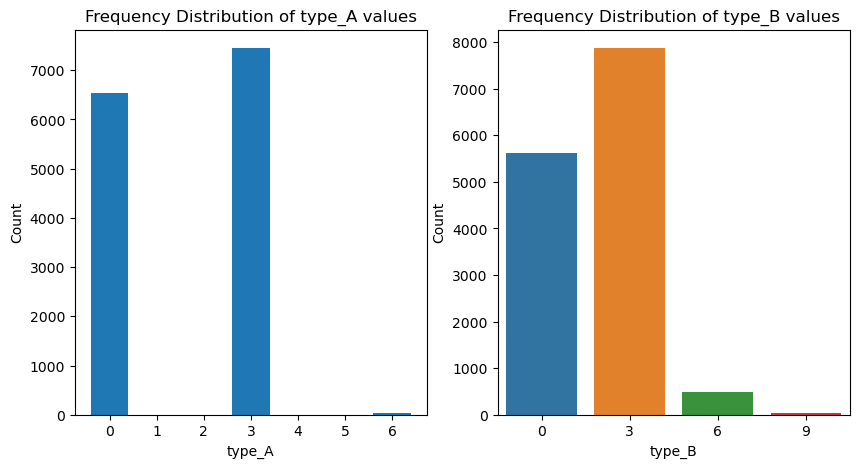

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
counts = subset_df['type_A'].value_counts()
plt.bar(counts.index, counts.values)
# Set plot label and title
plt.title('Frequency Distribution of type_A values')
plt.xlabel('type_A')
plt.ylabel('Count')


# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.countplot(x=subset_df['type_B'])
# Set plot label and title
plt.title('Frequency Distribution of type_B values')
plt.xlabel('type_B')
plt.ylabel('Count')
plt.show();

Product Type A:

Category 6: Notably absent, suggesting either no customers utilized this category or the data might be missing.
Category 0: Boasts a healthy user base, with approximately 6500 customers utilizing this category.
Category 3: Enjoys the most widespread adoption, exceeding Category 0 with a user base of approximately 8000 customers.

Product Type B:

Category 6 and 9: Both categories see minimal usage, indicating limited customer engagement.
Category 0: Similar to Product Type A, this category caters to a sizable customer base of roughly 5600 users.
Category 3: Emerges as the frontrunner, attracting nearly 8000 customers, mirroring the trend observed in Product Type A.

In [16]:
counts = subset_df['prod_A'].value_counts()
percentages = counts.apply(lambda x: (x / len(subset_df)) * 100)

print(f"Percentage of 0s: {percentages[0]:.2f}%")
print(f"Percentage of 1s: {percentages[1]:.2f}%")

Percentage of 0s: 46.62%
Percentage of 1s: 53.38%


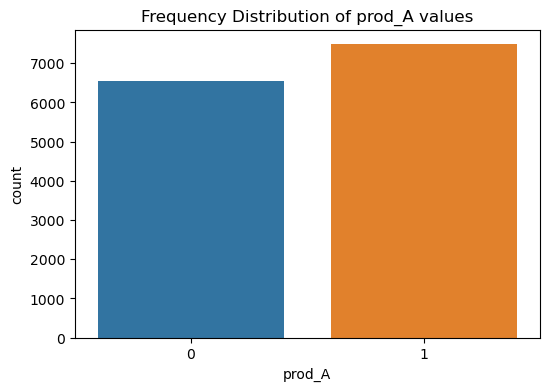

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='prod_A', data=subset_df)
plt.title('Frequency Distribution of prod_A values')
plt.show();

Customers who previously purchased Product A exhibit a higher propensity to purchase it again. This trend is reflected in the data, where the frequency of "YES" (indicating repurchases denoted by 1) is significantly higher than "NO" (indicating new purchases denoted by 0).

This observation suggests that customers who experience the value and satisfaction of using Product A are more likely to return for future purchases.

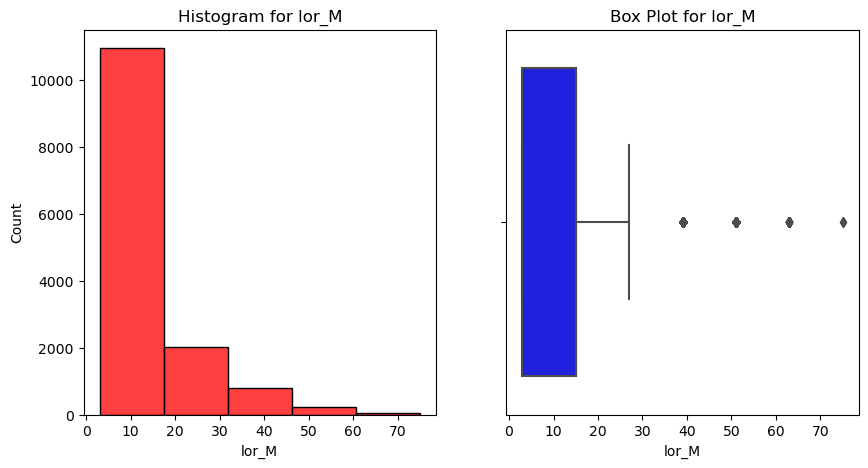

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(subset_df['lor_M'],bins =5, color='red')
# Set plot label and title
plt.title('Histogram for lor_M')
plt.xlabel('lor_M')
plt.ylabel('Count')


# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.boxplot(x='lor_M', data=subset_df, color='blue')
plt.title('Box Plot for lor_M')
plt.xlabel('lor_M')
plt.show();

The distribution of customer relationship length is highly skewed, with most customers falling within a narrow range of 3-17 months. 
The blue box in the box plot represents the main bulk of the data, tightly packed together. However, scattered beyond the whiskers lie several data points, far removed from the majority. These outliers, isolated from the central box, prevent us from clearly seeing the median, quartiles, and other insightful parameters within the box. This skewed distribution, with its outliers, suggests the need for further investigation to understand and potentially remove these anomalies for a more accurate analysis.

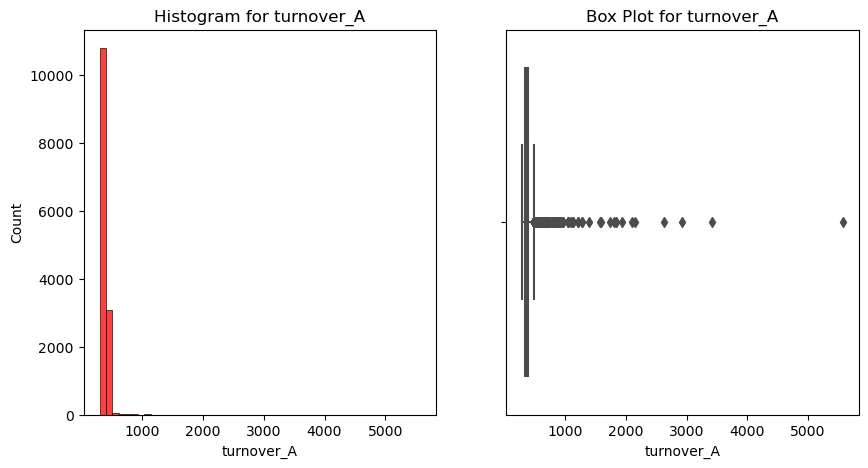

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(subset_df['turnover_A'],bins =50, color='red')
# Set plot label and title
plt.title('Histogram for turnover_A')
plt.xlabel('turnover_A')
plt.ylabel('Count')


# Axis level for plot 2
plt.subplot(1, 2, 2) 
sns.boxplot(x='turnover_A', data=subset_df, color='blue')
plt.title('Box Plot for turnover_A')
plt.xlabel('turnover_A')
plt.show();

The box plot of turnover_A data paints a clear picture: a significant number of observations lie outside the whiskers, signifying their status as outliers. These outliers, deviating significantly from the bulk of the data, exert a strong influence on the mean, potentially distorting our understanding of the underlying distribution.

#### Bivariate Analysis

In [23]:
subset_df['age_group'] = pd.cut(subset_df['age'], bins=[5, 21, 37, 53, 69, 85, 102],
                                         labels=['5-20', '21-36', '37-52', '53-68', '69-84', '85+'])

C:\Users\anag\AppData\Local\Temp\ipykernel_5448\3169511688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['age_group'] = pd.cut(subset_df['age'], bins=[5, 21, 37, 53, 69, 85, 102],


Text(0, 0.5, 'Count')

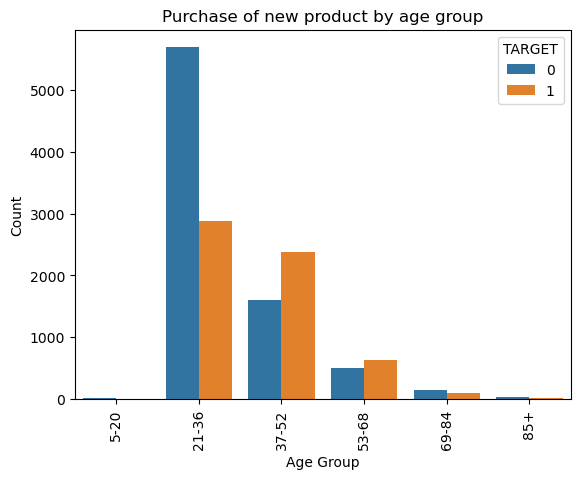

In [24]:
sns.countplot(x='age_group', hue='TARGET', data=subset_df[['age_group', 'TARGET']])
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Purchase of new product by age group')
plt.xlabel('Age Group')
plt.ylabel('Count')

Young Adults (21-36 ) mostly dont purchase again while the age group (37-52) seem to purchase again (here 0 represents not purhcasing and 1 means purchasing). The age group (53-68) seem to purhcase again . The counts of other age group is quite low. 

Text(0, 0.5, 'Count')

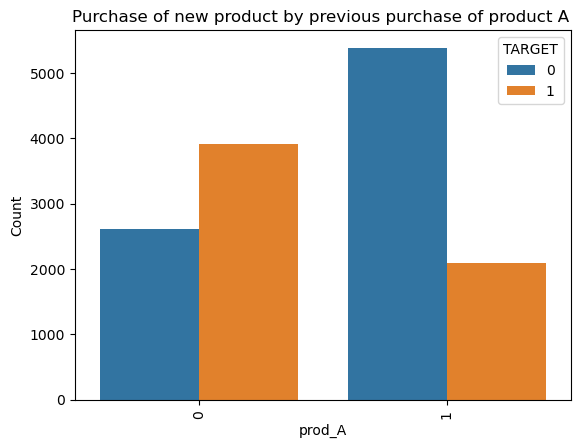

In [25]:
sns.countplot(x='prod_A', hue='TARGET', data=subset_df[['prod_A', 'TARGET']])
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Purchase of new product by previous purchase of product A ')
plt.xlabel('prod_A')
plt.ylabel('Count')

Customers who previously did not purchase product A were much less likely to purchase the new product.
The decline in "yes" responses for product A purchase among previous buyers significantly reduced the number of new product purchases.
A large proportion of customers who didn't buy product A ultimately opted out of purchasing the new product.

Text(0, 0.5, 'Count')

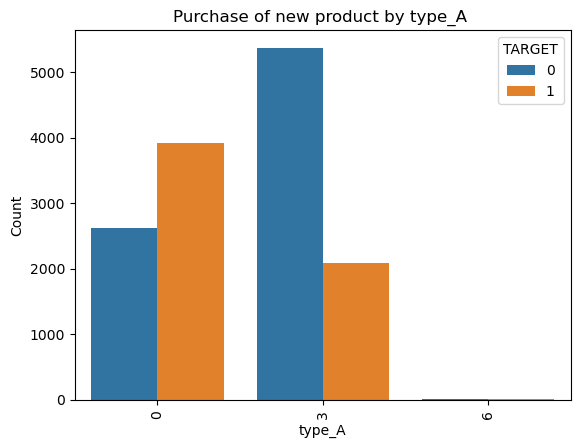

In [27]:
sns.countplot(x='type_A', hue='TARGET', data=subset_df[['type_A', 'TARGET']])
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Purchase of new product by type_A ')
plt.xlabel('type_A')
plt.ylabel('Count')

Type A product category 0 has a high repurchase rate, while category 3 has a low repurchase rate.
Customer behavior within Type A product categories is polarized, with category 0 displaying high repurchase intentions and category 3 showing the opposite.

Text(0, 0.5, 'Count')

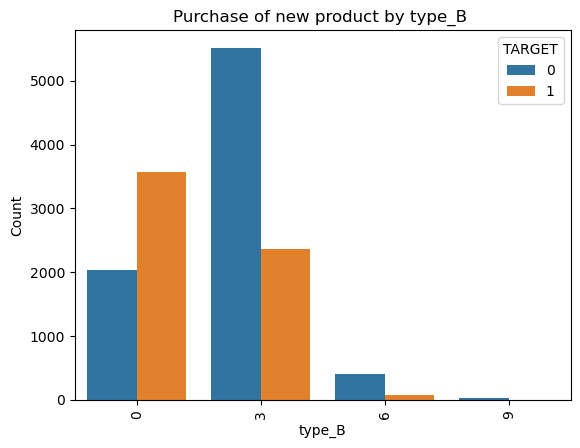

In [28]:
sns.countplot(x='type_B', hue='TARGET', data=subset_df[['type_B', 'TARGET']])
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Purchase of new product by type_B ')
plt.xlabel('type_B')
plt.ylabel('Count')

Similar to Type A, Type B product categories exhibit contrasting repurchase patterns. Category 0 boasts a high rate of repeat purchases, while categories 3 and 6 show a clear preference for discontinuance.
Category 0 reigns supreme among Type B products, attracting high repurchase rates. Conversely, categories 3 and 6 struggle to retain customers, with a majority choosing not to repurchase.

Text(0, 0.5, 'Count')

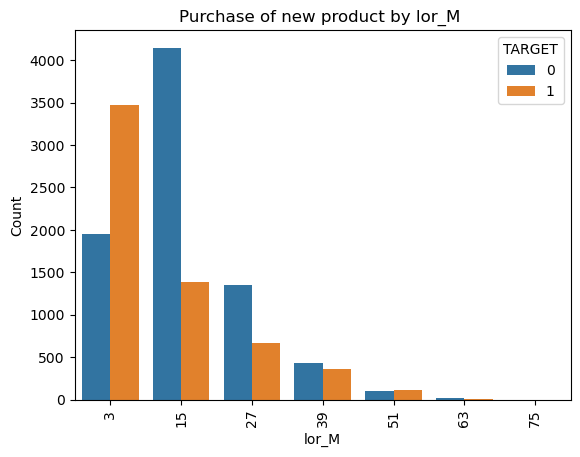

In [29]:
sns.countplot(x='lor_M', hue='TARGET', data=subset_df[['lor_M', 'TARGET']])
plt.xticks(rotation = 90)
# Set plot label and title
plt.title('Purchase of new product by lor_M ')
plt.xlabel('lor_M')
plt.ylabel('Count')

We are presented with a curious and surprising finding: customer relationship length seems to have an inverse relationship with product purchase.

Firstly, we observe that approximately 3,500 customers with shorter relationships (3 months) have actually purchased a product. This stands in stark contrast to over 4,000 customers, boasting longer relationships (15 months), who haven't made any purchases.

<Axes: xlabel='age', ylabel='Count'>

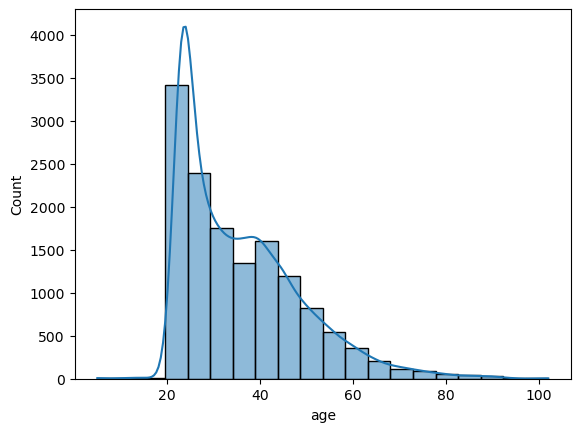

In [30]:
sns.histplot(subset_df['age'], bins=20, kde=True)

Age distribution reveals no significant relationship with purchase behavior.
Age alone lacks predictive power for identifying potential customers.

Text(0.5, 1.0, 'Frequency Distribution of type_A ')

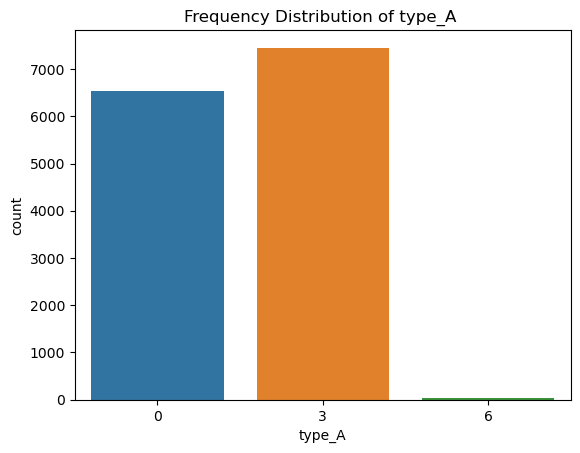

In [31]:
sns.countplot(x='type_A', data=subset_df)
plt.title('Frequency Distribution of type_A ')

Text(0.5, 1.0, 'Frequency Distribution of type_B ')

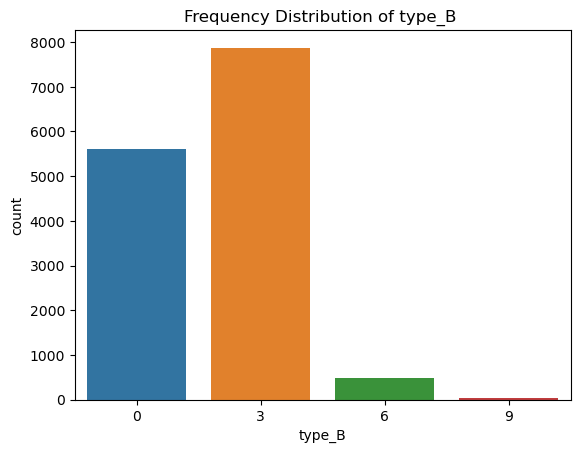

In [32]:
sns.countplot(x='type_B', data=subset_df)
plt.title('Frequency Distribution of type_B ')

The observed variability and potential patterns in customer behavior across Type_A and Type_B categories suggest that these variables hold promise as predictors of product purchase.

Text(0.5, 1.0, 'type_A vs Target ')

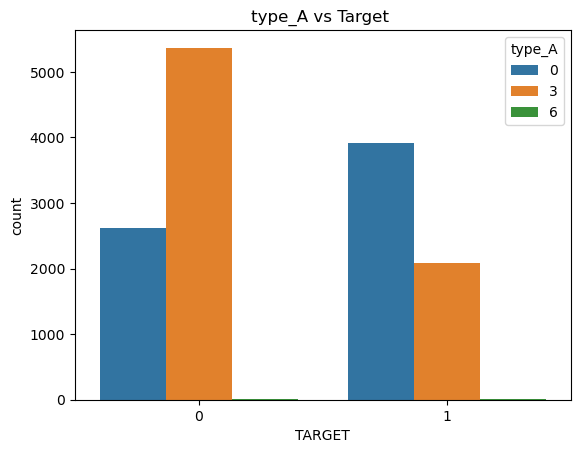

In [34]:
sns.countplot(x='TARGET', hue='type_A', data=subset_df)
plt.title('type_A vs Target ')

The distribution of Type_A customers appears to be significantly different across the target categories. Notably, there is a much higher concentration of Type_A customers among those who purchased additional products. This suggests a potential association between being a Type_A customer and the likelihood of purchasing additional products.

Although age and lor_M may not be significant predictors in isolation, the inclusion of customer types (Type_A and Type_B) shows potential for improving prediction accuracy.

Also while the initial analysis suggests that age and lor_M might not be strong individual predictors, their potential combined effect shouldn't be disregarded

In [35]:
subset_df['type_A'] = subset_df['type_A'].astype(str)
subset_df['type_B'] = subset_df['type_B'].astype(str)

C:\Users\anag\AppData\Local\Temp\ipykernel_5448\896713471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['type_A'] = subset_df['type_A'].astype(str)
C:\Users\anag\AppData\Local\Temp\ipykernel_5448\896713471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['type_B'] = subset_df['type_B'].astype(str)


Converts the data type of the type_A and type_B columns to string format

In [36]:
dummy_df = pd.get_dummies(subset_df[['type_A', 'type_B']])

subset_df = pd.concat([subset_df, dummy_df], axis=1)

subset_df.drop(['type_A', 'type_B', 'age_group'], axis=1, inplace=True)

pd.get_dummies(subset_df[['type_A', 'type_B']]) creates dummy variables for each unique value in the type_A and type_B columns.
This essentially converts each categorical variable into multiple binary features, representing the presence or absence of each category.

pd.concat([subset_df, dummy_df], axis=1) combines the original DataFrame (subset_df) with the newly created dummy variables DataFrame (dummy_df).
This results in a single DataFrame with all the original features and the newly created dummy features.

subset_df.drop(['type_A', 'type_B', 'age_group'], axis=1, inplace=True) removes the original categorical features (type_A and type_B) and the age_group feature from the combined DataFrame.
This is typically done because the information is now encoded in the newly created dummy variables, and the original features are no longer needed.

In [37]:
subset_df

,TARGET,age,lor_M,prod_A,turnover_A,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1,66,3,0,333.561114,1,0,0,1,0,0,0
1,1,45,39,1,394.735699,0,1,0,0,1,0,0
2,1,42,27,1,342.180990,0,1,0,0,0,1,0
3,1,31,3,0,453.757916,1,0,0,1,0,0,0
4,1,62,3,0,384.577469,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,30,3,0,386.434278,1,0,0,1,0,0,0
14012,1,27,27,1,376.842591,0,1,0,0,1,0,0
14013,1,26,3,0,434.805703,1,0,0,1,0,0,0
14014,1,75,15,1,366.273857,0,1,0,0,1,0,0


## Building Predictive Models

In [38]:
#Importing the necessary libraries
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Logistic Regression using Scikit-learn

We will employ Logistic Regression, a widely used statistical technique for binary classification, to analyze the provided dataset and predict customer purchase behavior. We will commence by meticulously segregating the data into dependent (purchase) and independent (customer characteristics) variables. Subsequently, the data will be strategically partitioned into training and testing sets. The training set will serve as the bedrock for constructing a robust Logistic Regression model, while the testing set will furnish an invaluable assessment of the model's predictive prowess.

In [39]:
# creates a new DataFrame called feature_columns by dropping the 'TARGET' column from the original DataFrame subset_df.
feature_columns = subset_df.drop('TARGET', axis =1)
# extracts the 'TARGET' column from the original DataFrame subset_df and assigns it to the variable target_column
target_column = subset_df['TARGET']

In [40]:
# assigns the DataFrame containing all the feature columns to the variable X
X = feature_columns
# assigns the Series containing the target variable to the variable y
y = target_column

# splits the data into training and testing sets
# test_size=0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state=42 sets the random seed for reproducibility. This ensures that the data is split consistently, 
# even if the code is run multiple times.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# create a new instance of the LogisticRegression class, which is provided by the scikit-learn library.
model = LogisticRegression()

# trains the Logistic Regression model using the training data.
# X_train represents the feature data used for training.
# y_train represents the target data used for training.
model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# calculates and returns the accuracy score of the model on the training data.
model.score(X_train, y_train)

0.7454513021762398

The model has a accuracy score of 74.54% which seems okay for our analysis.
However note that the value of this accuracy score may have different level of significance in different cases.

The analysis of regression model coefficients offers valuable insights into the influence of independent variables on the dependent variable. By examining the sign and magnitude of each coefficient, we can discern the direction and strength of the relationship between each variable and the predicted outcome.

In [43]:
# accesses the coef_ attribute of the trained Logistic Regression model. 
# This attribute holds an array containing the estimated coefficients for the model.
model.coef_

array([[ 0.04251981,  0.01712161, -1.17234269,  0.01107732, -2.32776243,
        -1.1508083 , -0.02153438,  0.71526125, -1.00345914, -2.83819659,
        -0.37371063]])

Features with positive coefficients, like age, lor_M, and product type B=0, positively influence the predicted outcome, meaning they increase the likelihood of a customer purchasing an additional product. Conversely, features with negative coefficients, like product A and type_A=3, negatively influence the outcome, decreasing the likelihood of a purchase.
The strength of a feature's influence is reflected in the absolute value of its coefficient. Features with larger absolute coefficients, like type_B=0, have a greater impact on the prediction compared to features with smaller absolute values.

In [45]:
#  uses the trained Logistic Regression model to make predictions on the unseen test data
y_predict = model.predict(X_test)

#### Evaluation metrics

In [46]:
# calculates the accuracy of the model's predictions on the test data
acc = accuracy_score(y_test, y_predict)
# creates a confusion matrix, which provides a detailed breakdown of the model's performance.
conf_matrix = confusion_matrix(y_test, y_predict)
# generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
# and support for each class.
report = classification_report(y_test, y_predict)

print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7514265335235378
Confusion Matrix:
[[1313  294]
 [ 403  794]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1607
           1       0.73      0.66      0.69      1197

    accuracy                           0.75      2804
   macro avg       0.75      0.74      0.74      2804
weighted avg       0.75      0.75      0.75      2804



The model achieved an accuracy of roughly 75.14%, successfully predicting the target variable for over three-quarters of the instances.

Confusion Matrix 
- The model correctly identified 794 customers who were not likely to purchase (true negatives).
- The model successfully identified 1313 customers who were likely to purchase (true positives).
- The model incorrectly classified 294 customers as likely to purchase when they were not (false positives).
- The model incorrectly classified 403 customers as not likely to purchase when they were (false negatives).

Classification Report 
- The precision for class 0 indicates that out of all instances predicted as positive, 77% were actually true positives. Similarly, the precision for class 1 shows that 73% of predictions for positive instances were correct.
- The recall for class 0 indicates that out of all actual positive instances, 82% were correctly predicted as positive by the model. Similarly, the recall for class 1 shows that 66% of actual positive instances were correctly identified.
- The model achieves a balanced performance for class 0 with an F1-score of 0.79, while class 1 exhibits a slightly lower score of 0.69.


#### Using Random Forest Classifier

In [48]:
# RandomForestClassifier is instantiated with a random_state of 30 to ensure reproducibility.
random_forest_model = RandomForestClassifier(random_state=30)
# fit() method is used to train the model on the training data (X_train and y_train).
# Involves building multiple decision trees based on the training data and 
# learning the relationships between features and target variables.
random_forest_model.fit(X_train, y_train)
# predict() method is used to make predictions on the unseen test data (X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the new model
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f"\nRandom Forest Model Accuracy: {random_forest_accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_random_forest))


Random Forest Model Accuracy: 0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1607
           1       0.80      0.93      0.86      1197

    accuracy                           0.87      2804
   macro avg       0.87      0.88      0.87      2804
weighted avg       0.88      0.87      0.87      2804



The model achieved an accuracy of roughly 87% which was better than the previous one . 

Classification Report 
- The precision for class 0 indicates that out of all instances predicted as positive, 94% were actually true positives. Similarly, the precision for class 1 shows that 80% of predictions for positive instances were correct.
- The recall for class 0 indicates that out of all actual positive instances, 83% were correctly predicted as positive by the model. Similarly, the recall for class 1 shows that 93% of actual positive instances were correctly identified.
- The model achieves a balanced performance for class 0 with an F1-score of 0.88, while class 1 exhibits a similar but lower score of 0.86.


In [49]:
# stores the importance scores for each feature in the model.
feature_significance = random_forest_model.feature_importances_

# stores a list of strings corresponding to the names of all features in the data.
feature_names = X.columns

# indices is created by sorting the feature importance scores in reverse order (highest to lowest).
indices = feature_significance.argsort()[::-1]

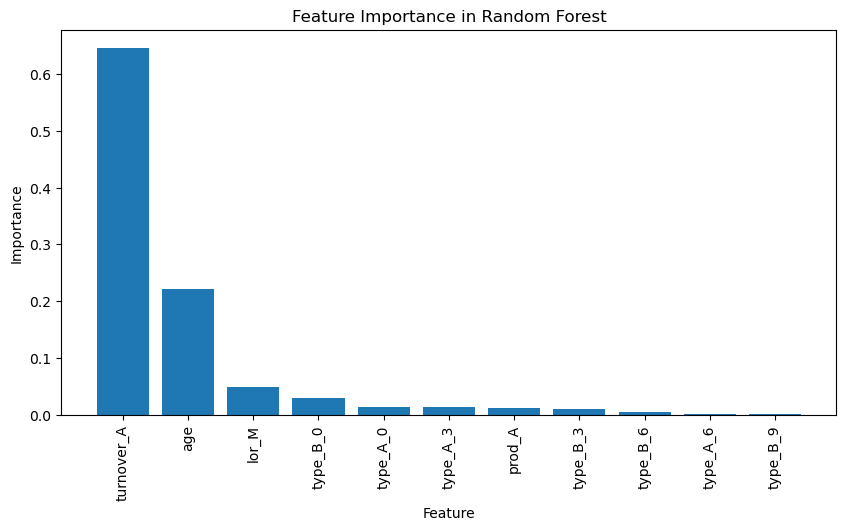

In [50]:
# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), feature_significance[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

We do observe that turnover_A was the most important feature in the random forest classifier . It was followed by age and rest of the features did not have that much importance.

## Conclusion

Our comprehensive analysis of various models and hyperparameters has produced promising insights. Through extensive testing with diverse models and accuracy metrics, the Random Forest model emerged as the superior performer, achieving an impressive 87% accuracy.  Subsequently, we delved deeper into the Random Forest model to identify the features that exert the most significant influence on prediction accuracy. This investigation revealed turnover_A and age as the top two features, highlighting their substantial impact on model performance.

Although these results provide a robust foundation for future advancements, we acknowledge the potential for substantial improvement. Investigations into novel approaches, including neural networks and deep learning, coupled with comprehensive hyperparameter tuning and cross-validation techniques, offer promising avenues towards further enhancing model accuracy and optimizing decision-making capabilities.